In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# импортируем библиотечные функции -- прямое и обратное быстрое преобразование Фурье
from scipy.fft import fft, ifft

In [2]:
pip install pydsm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 552 kB 5.1 MB/s 
  Created wheel for pydsm: filename=pydsm-0.14.0.0-cp37-cp37m-linux_x86_64.whl size=684741 sha256=2ae6ef3e71c6f7aca1bb21bb2dc0ac72ac51e551071d41d4a68c5d0e8c756630
  Stored in directory: /root/.cache/pip/wheels/1d/37/8e/15939ed2fb3dcf8bbab167a0bf7c7155c2e6fa4df16d490260
Successfully built pydsm


In [3]:
import pydsm

In [4]:
N = 32
m0 = 10
m1 = 0.85

In [5]:
k = np.array(range(N))
n = np.array(range(N))
x_k = np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)

## Task 3.1

In [6]:
# ДВПФ для заданной последовательности (функция от nu)
X = pydsm.ft.dtft(x_k)
nu_range = np.linspace(0, 1, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


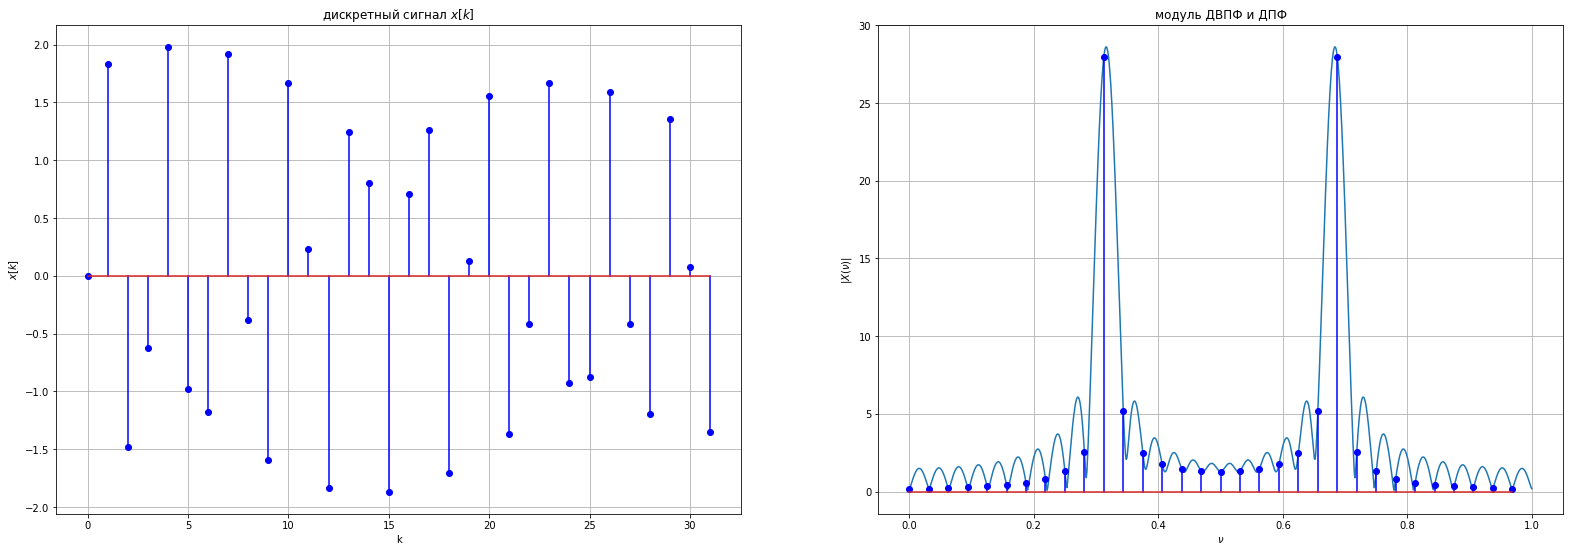

In [7]:
plt.figure(figsize=(27, 9))

plt.subplot(1, 2, 1)
plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.title(r'модуль ДВПФ и ДПФ')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')

plt.stem(n/N, abs(fft(x_k)), 'b', 'bo')
plt.grid()

In [8]:
# расширим дискретный сигнал нулевыми отсчетами
M = 50
x_k = np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)
x_k = np.concatenate((x_k, np.zeros(M)), None)

# ДВПФ для заданной последовательности (функция от nu)
X = pydsm.ft.dtft(x_k)
nu_range = np.linspace(0, 1, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


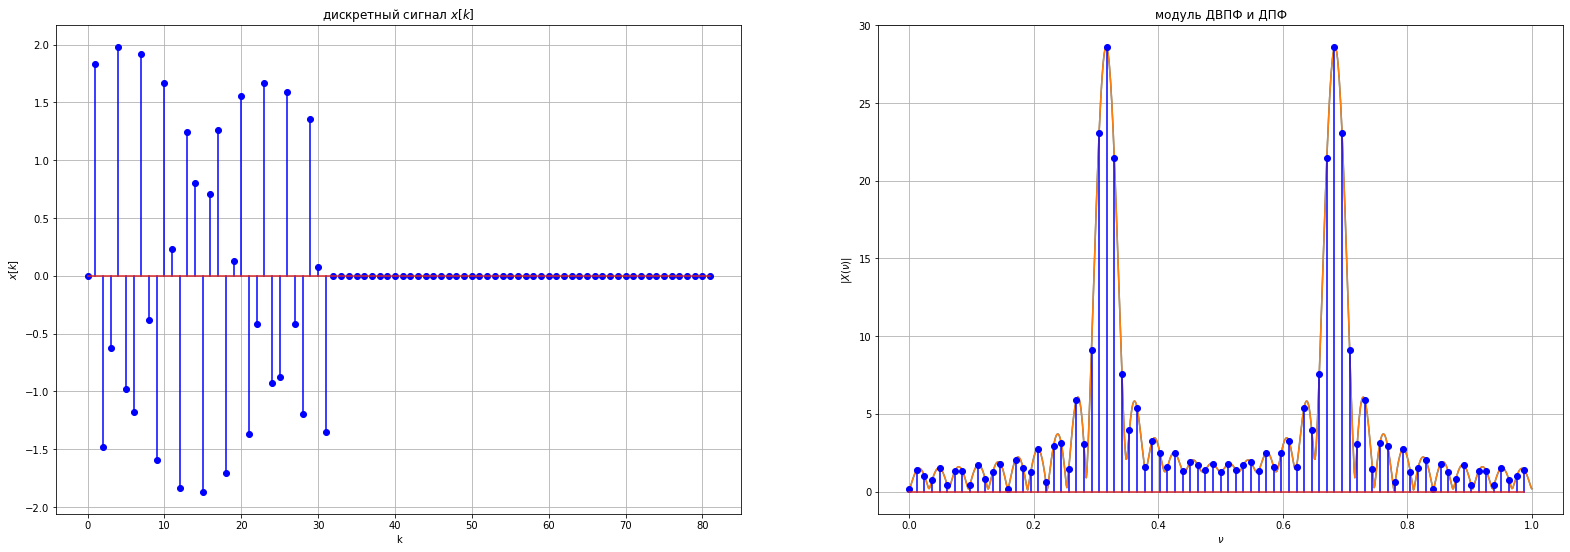

In [10]:
plt.figure(figsize=(27, 9))

plt.subplot(1, 2, 1)
plt.stem(np.array(range(N+M)), x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.plot(nu_range, X_abs_range)
plt.title(r'модуль ДВПФ и ДПФ')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')

plt.stem(np.array(range(M+N))/(N+M), abs(fft(x_k)), 'b', 'bo')
plt.grid()

Заметим, что исходный дискретный сигнал не поменялся, так как мы всего лишь добавили некоторое количество нулевых отсчетов. Соответственно, не поменялось ДВПФ, при этом точность ДПФ повысилось.